###Import Datasets

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load training and testing datasets
test_df = pd.read_csv("/content/drive/MyDrive/Datasets AP moller/Test Dataset.csv")
train_df = pd.read_csv("/content/drive/MyDrive/Datasets AP moller/Training Dataset.csv")

test_final_df = test_df
train_final_df = train_df
print(train_df.head())
print(test_df.head())

  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM3           X1       A28        WHOLESALE        Large   
1        NTM2           X1        A9           DIRECT        Large   
2        NTM3           X2       A20           DIRECT        Large   
3        NTM3           X1       A18        WHOLESALE        Small   
4        NTM2           X1       A28           DIRECT        Large   

  Product Type Month of Sourcing  Sourcing Cost  
0       Powder            May-21          10.16  
1       Powder            Oct-20         134.28  
2       Powder            Dec-20          12.46  
3       Powder            Feb-21         107.22  
4       Liquid            Nov-20         197.76  
  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM1           X1        A1           DIRECT        Small   
1        NTM1           X1       A10           DIRECT        Large   
2        NTM1           X1       A10             ECOM        Large   

### Splitting Month and Year for later time series analysis

In [190]:
# Assuming train_df and test_df are your DataFrame names

# Splitting "Month of Sourcing" into "Month" and "Year" for train_df
train_df[['Month', 'Year']] = train_df['Month of Sourcing'].str.split('-', expand=True)

# Splitting "Month of Sourcing" into "Month" and "Year" for test_df
test_df[['Month', 'Year']] = test_df['Month of Sourcing'].str.split('-', expand=True)

# Dropping the original "Month of Sourcing" column
train_df.drop(columns=['Month of Sourcing'], inplace=True)
test_df.drop(columns=['Month of Sourcing'], inplace=True)

# Printing the first few rows to verify the changes
print(train_df.head())
print(test_df.head())

  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM3           X1       A28        WHOLESALE        Large   
1        NTM2           X1        A9           DIRECT        Large   
2        NTM3           X2       A20           DIRECT        Large   
3        NTM3           X1       A18        WHOLESALE        Small   
4        NTM2           X1       A28           DIRECT        Large   

  Product Type  Sourcing Cost Month Year  
0       Powder          10.16   May   21  
1       Powder         134.28   Oct   20  
2       Powder          12.46   Dec   20  
3       Powder         107.22   Feb   21  
4       Liquid         197.76   Nov   20  
  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM1           X1        A1           DIRECT        Small   
1        NTM1           X1       A10           DIRECT        Large   
2        NTM1           X1       A10             ECOM        Large   
3        NTM1           X1       A11     

##EDA

###One hot encoding to fit into random forest regression model and finding correlations

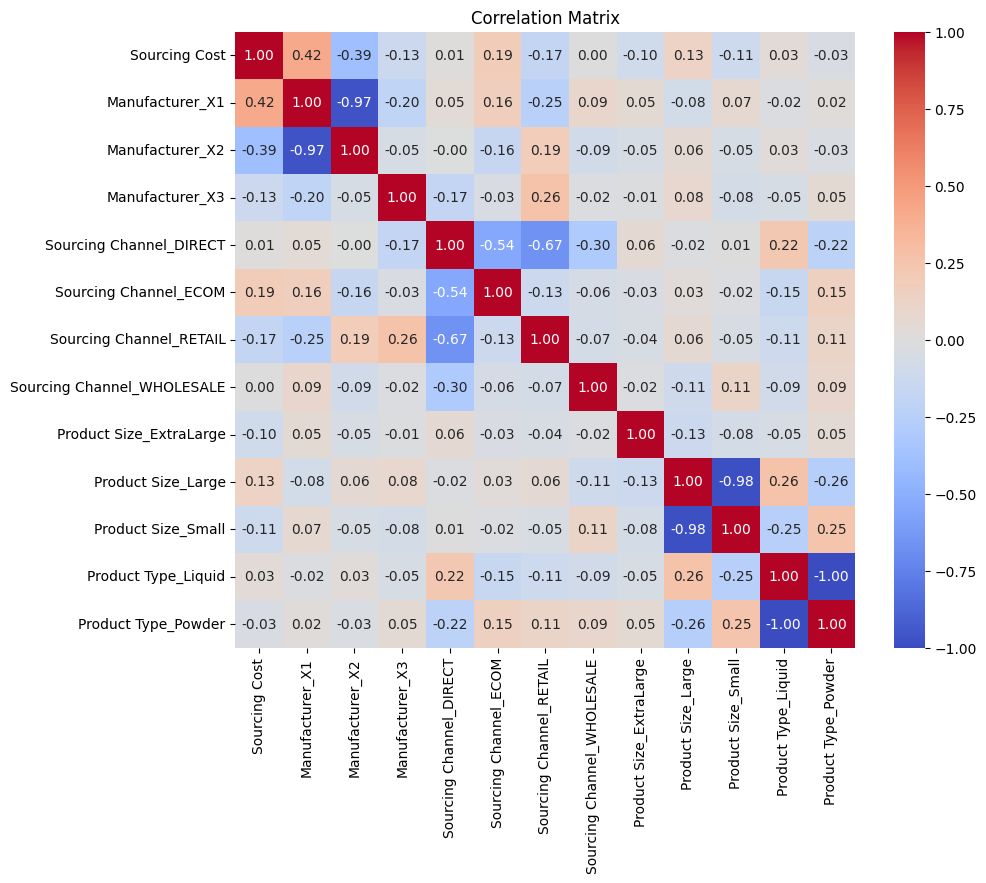

In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming test_df is your testing DataFrame


# Selecting desired columns including "Sourcing Cost"
selected_columns = ["Manufacturer", "Sourcing Channel", "Product Size", "Product Type", "Sourcing Cost"]
test_selected = test_df[selected_columns]

# Convert categorical variables to numerical representations using one-hot encoding
# For categorical columns
categorical_columns = ["Manufacturer", "Sourcing Channel", "Product Size", "Product Type"]
test_encoded = pd.get_dummies(test_selected, columns=categorical_columns)

# Compute the correlation matrix
correlation_matrix = test_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Add title and display the plot
plt.title("Correlation Matrix")
plt.show()


###Transforming area codes into similar values (numerical)

In [192]:

from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Combine the area codes from both datasets to fit the encoder using pd.concat
combined_area_codes = pd.concat([train_df['Area Code'], test_df['Area Code']])

# Fit the label encoder on the combined data
label_encoder.fit(combined_area_codes)

# Transform the area codes in both datasets
train_df['Area Code'] = label_encoder.transform(train_df['Area Code'])
test_df['Area Code'] = label_encoder.transform(test_df['Area Code'])

# Check the transformed area codes in both datasets
print("Transformed Area Codes in Training Data:", train_df['Area Code'].unique())
print("Transformed Area Codes in Testing Data:", test_df['Area Code'].unique())

Transformed Area Codes in Training Data: [19 44 12  9  1 10 20 42 11 43 32 41 22 27 37 38 23 17 29 24 26 39  2 31
 34  8 30 40 14 21  3 16 28 35  5 36 25  6 33 13  7  4  0 15 18]
Transformed Area Codes in Testing Data: [ 0  1  2 11 19 20 21 25 26 32 41 42 43 44  3 13 22 23 31 33 35 36 37 38
 39  7  8 10 15 18 24 28 29 30 34 40 17  4  5  6  9 16 27 12 14]


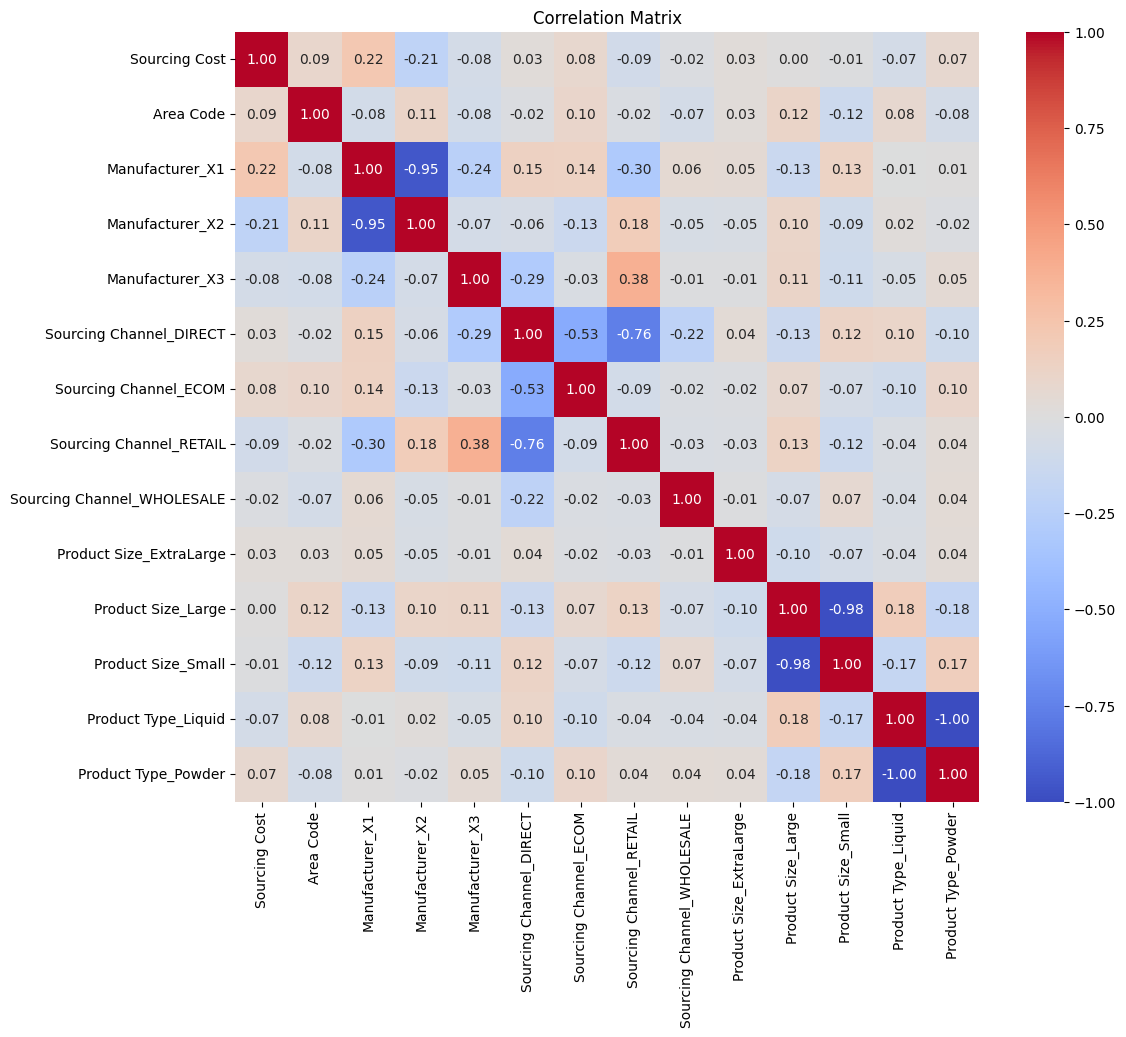

  Manufacturer Sourcing Channel Product Size Product Type  Sourcing Cost  \
0           X1        WHOLESALE        Large       Powder          10.16   
1           X1           DIRECT        Large       Powder         134.28   
2           X2           DIRECT        Large       Powder          12.46   
3           X1        WHOLESALE        Small       Powder         107.22   
4           X1           DIRECT        Large       Liquid         197.76   

   Area Code  
0         19  
1         44  
2         12  
3          9  
4         19  


In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_df is your training DataFrame

# Update selected columns to include "Area Code"
selected_columns = ["Manufacturer", "Sourcing Channel", "Product Size", "Product Type", "Sourcing Cost", "Area Code"]
train_selected = train_df[selected_columns]

# Convert categorical variables to numerical representations using one-hot encoding
# For categorical columns
categorical_columns = ["Manufacturer", "Sourcing Channel", "Product Size", "Product Type"]
train_encoded = pd.get_dummies(train_selected, columns=categorical_columns)

# Compute the correlation matrix
correlation_matrix = train_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Add title and display the plot
plt.title("Correlation Matrix")
plt.show()

print(train_selected.head())

###Making scatter plot for each features vs Sourcing Cost

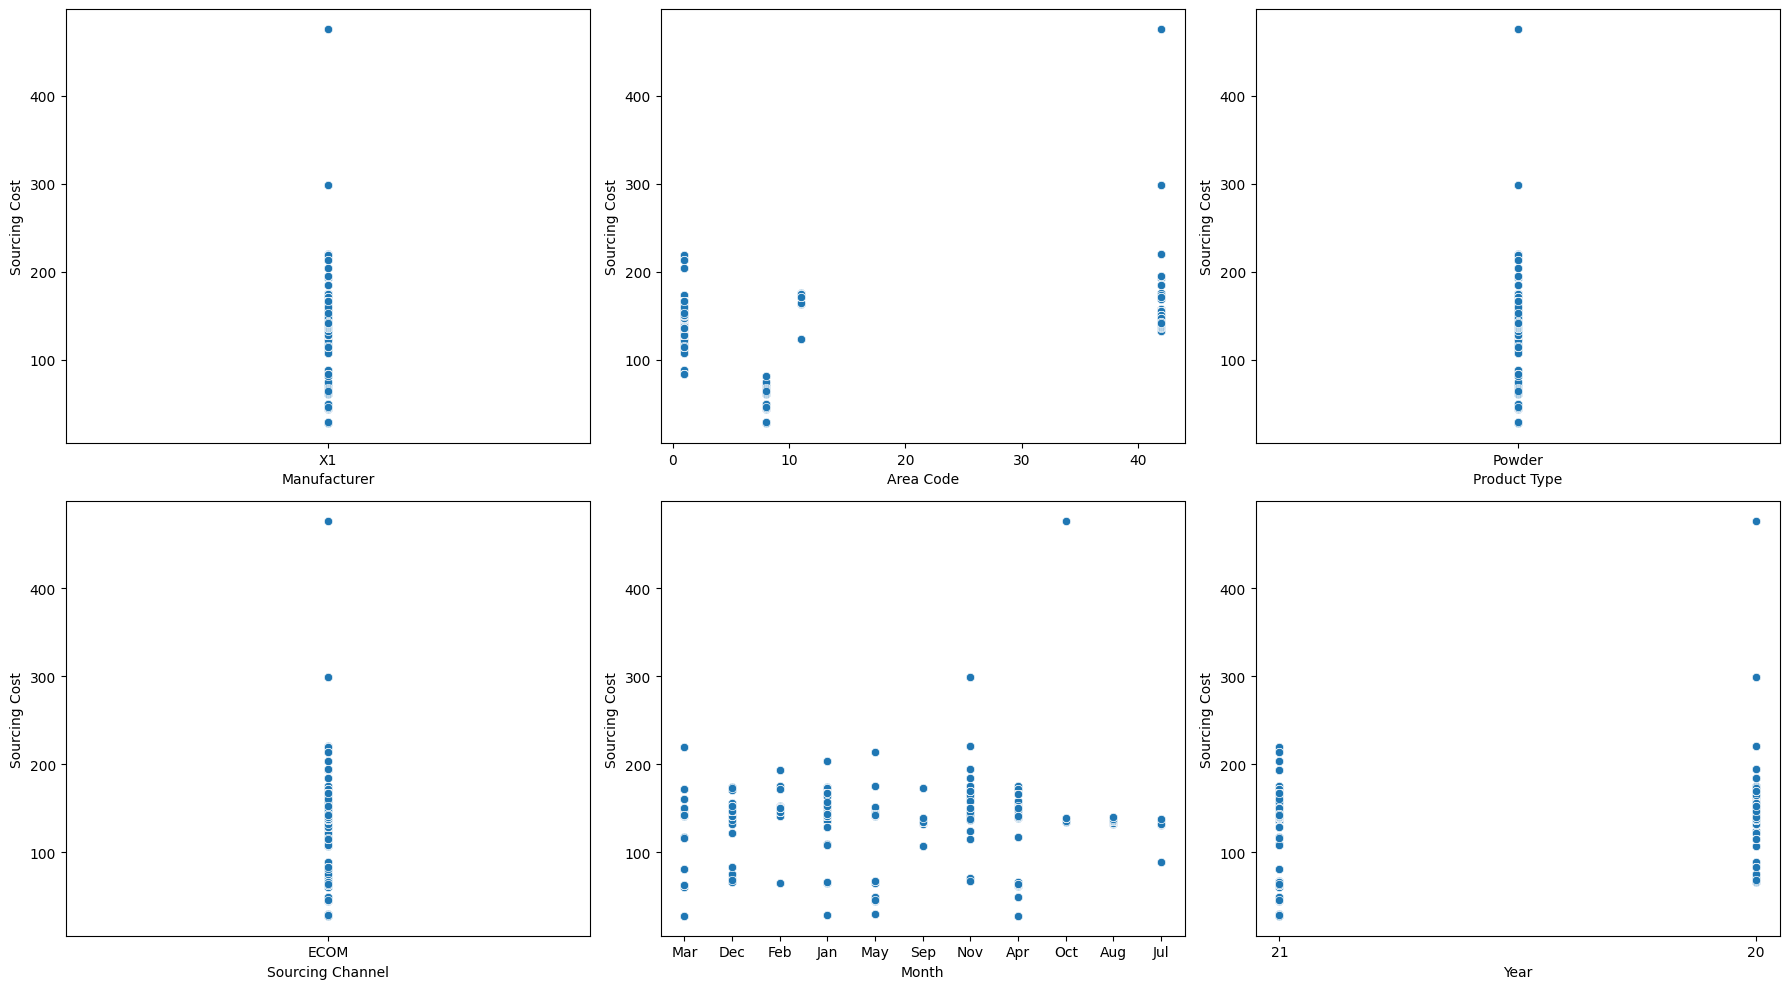

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_df is your training DataFrame

# Selecting desired columns
selected_columns = ["Manufacturer", "Area Code", "Product Type", "Sourcing Channel", "Month", "Year", "Sourcing Cost"]
train_selected = train_df[selected_columns]

# Filtering rows based on specified conditions
train_filtered = train_selected[(train_selected["Manufacturer"] == "X1") &
                                (train_selected["Product Type"] == "Powder") &
                                (train_selected["Sourcing Channel"].isin(["ECOM", "Retail"]))]

# Set up the matplotlib figure
plt.figure(figsize=(18, 10))

# Plotting Manufacturer vs Sourcing Cost
plt.subplot(2, 3, 1)
sns.scatterplot(x="Manufacturer", y="Sourcing Cost", data=train_filtered)

# Plotting Area Code vs Sourcing Cost
plt.subplot(2, 3, 2)
sns.scatterplot(x="Area Code", y="Sourcing Cost", data=train_filtered)

# Plotting Product Type vs Sourcing Cost
plt.subplot(2, 3, 3)
sns.scatterplot(x="Product Type", y="Sourcing Cost", data=train_filtered)

# Plotting Sourcing Channel vs Sourcing Cost
plt.subplot(2, 3, 4)
sns.scatterplot(x="Sourcing Channel", y="Sourcing Cost", data=train_filtered)

# Plotting Month vs Sourcing Cost
plt.subplot(2, 3, 5)
sns.scatterplot(x="Month", y="Sourcing Cost", data=train_filtered)

# Plotting Year vs Sourcing Cost
plt.subplot(2, 3, 6)
sns.scatterplot(x="Year", y="Sourcing Cost", data=train_filtered)

# Adjusting layout
plt.tight_layout()

# Displaying the plots
plt.show()

###This next part is done to find out outliers in each dataset based on Sourcing Cost range

In [195]:
import numpy as np

# Define function to create ranges of "Sourcing Cost" and count occurrences in each range for a specific feature
def count_points_in_cost_ranges(data, feature_name):
    # Define bins for "Sourcing Cost" ranges
    bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, np.inf]

    # Filter data for "Product Type" equal to "Powder"
    powder_data = data[data['Product Type'] == 'Powder']  # Corrected the column name here

    # Compute ranges and count occurrences
    cost_ranges = pd.cut(powder_data[feature_name], bins=bins, right=False)  # Corrected the column name here
    cost_range_counts = cost_ranges.value_counts().sort_index()

    return cost_range_counts

# Print counts of points in each cost range for the "Product Type" feature with "Powder" only
print("Counts of points in each cost range for Product Type (Powder):")
print(count_points_in_cost_ranges(train_selected, "Sourcing Cost"))  # Pass the correct DataFrame and column name here


Counts of points in each cost range for Product Type (Powder):
Sourcing Cost
[0.0, 50.0)        82378
[50.0, 100.0)      93279
[100.0, 150.0)    216667
[150.0, 200.0)     64388
[200.0, 250.0)     11803
[250.0, 300.0)       951
[300.0, 350.0)       123
[350.0, 400.0)       427
[400.0, inf)        1408
Name: count, dtype: int64


In [50]:
import numpy as np

# Define function to create ranges of "Sourcing Cost" and compute counts or sums for each specified feature
def compute_feature_counts_or_sums(data, feature_name, filter_condition=None, filter_value=None):
    # Define bins for "Sourcing Cost" ranges
    bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, np.inf]

    # Filter data if filter_condition and filter_value are provided
    if filter_condition is not None and filter_value is not None:
        data = data[data[filter_condition] == filter_value]

    # Compute ranges and count occurrences or sum values
    cost_ranges = pd.cut(data['Sourcing Cost'], bins=bins, right=False)
    counts_or_sums = cost_ranges.value_counts().sort_index()

    return counts_or_sums

# Print counts or sums of points in each cost range for each specified feature
print("Counts or sums of points in each cost range for each specified feature:")

# Manufacturer (X1)
print("Manufacturer (X1):")
print(compute_feature_counts_or_sums(train_selected, "Sourcing Cost", "Manufacturer", "X1"))
print()

# Area Code (sum across all area codes)
print("Area Code (sum across all area codes):")
print(compute_feature_counts_or_sums(train_selected, "Sourcing Cost"))
print()

# Sourcing Channel (ECOM and Retail)
print("Sourcing Channel (ECOM and Retail):")
print(compute_feature_counts_or_sums(train_selected, "Sourcing Cost", "Sourcing Channel", "ECOM") +
      compute_feature_counts_or_sums(train_selected, "Sourcing Cost", "Sourcing Channel", "RETAIL"))
print()



Counts or sums of points in each cost range for each specified feature:
Manufacturer (X1):
Sourcing Cost
[0.0, 50.0)        46842
[50.0, 100.0)      76468
[100.0, 150.0)    221272
[150.0, 200.0)     61137
[200.0, 250.0)     11117
[250.0, 300.0)       606
[300.0, 350.0)       162
[350.0, 400.0)       456
[400.0, inf)        1640
Name: count, dtype: int64

Area Code (sum across all area codes):
Sourcing Cost
[0.0, 50.0)       112793
[50.0, 100.0)     105671
[100.0, 150.0)    237059
[150.0, 200.0)     77534
[200.0, 250.0)     13579
[250.0, 300.0)      1085
[300.0, 350.0)       162
[350.0, 400.0)       456
[400.0, inf)        1653
Name: count, dtype: int64

Sourcing Channel (ECOM and Retail):
Sourcing Cost
[0.0, 50.0)       18077
[50.0, 100.0)     21041
[100.0, 150.0)    37663
[150.0, 200.0)    13536
[200.0, 250.0)      631
[250.0, 300.0)       84
[300.0, 350.0)        3
[350.0, 400.0)        0
[400.0, inf)         56
Name: count, dtype: int64



In [39]:
import numpy as np

# Define function to create ranges of "Sourcing Cost" and compute sum across all specified months
def compute_sums_across_months(data, month_names):
    # Define bins for "Sourcing Cost" ranges
    bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, np.inf]

    # Initialize dictionary to store sums for each range of "Sourcing Cost"
    cost_range_sums = {}

    # Compute sums for each range of "Sourcing Cost" across all specified months
    for month_name in month_names:
        month_data = data[data['Month'] == month_name]
        cost_ranges = pd.cut(month_data['Sourcing Cost'], bins=bins, right=False)
        cost_range_counts = cost_ranges.value_counts().sort_index()
        for cost_range, count in cost_range_counts.items():
            cost_range_sums[cost_range] = cost_range_sums.get(cost_range, 0) + count

    return cost_range_sums

# Specify the list of months
months = ["Mar", "Dec", "Feb", "Jan", "May", "Sep", "Nov", "APr", "Oct", "Aug", "Jul"]

# Compute sums of points in each cost range across all specified months
range_sums_across_months = compute_sums_across_months(train_selected, months)

# Print the sum of "Sourcing Cost" within each range across all specified months
print("Output final:")
for cost_range, total_sum in range_sums_across_months.items():
    print(f"{cost_range}: {total_sum}")


Output final:
[0.0, 50.0): 102634
[50.0, 100.0): 96201
[100.0, 150.0): 215790
[150.0, 200.0): 67863
[200.0, 250.0): 11940
[250.0, 300.0): 993
[300.0, 350.0): 154
[350.0, 400.0): 432
[400.0, inf): 1593


In [72]:
import numpy as np

# Define function to create ranges of "Sourcing Cost" and compute counts or sums for each specified feature
def compute_feature_counts_or_sums(data, feature_name, filter_condition=None, filter_value=None):
    # Define bins for "Sourcing Cost" ranges
    bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, np.inf]

    # Filter data if filter_condition and filter_value are provided
    if filter_condition is not None and filter_value is not None:
        data = data[data[filter_condition] == filter_value]

    # Compute ranges and count occurrences or sum values
    cost_ranges = pd.cut(data['Sourcing Cost'], bins=bins, right=False)
    counts_or_sums = cost_ranges.value_counts().sort_index()

    return counts_or_sums

# Compute sums for Year 21
year_21_sums = compute_feature_counts_or_sums(train_selected, "Sourcing Cost", "Year", "21")

# Compute sums for Year 20
year_20_sums = compute_feature_counts_or_sums(train_selected, "Sourcing Cost", "Year", "20")

# Combine sums for both years into a final list
final_sums = [sum(x) for x in zip(year_21_sums, year_20_sums)]

# Print the combined total for each range
print("Combined total for each range:")
print("0-50:", final_sums[0])
print("50-100:", final_sums[1])
print("100-150:", final_sums[2])
print("150-200:", final_sums[3])
print("200-250:", final_sums[4])
print("250-300:", final_sums[5])
print("300-350:", final_sums[6])
print("350-400:", final_sums[7])
print("400-inf:", final_sums[8])


Combined total for each range:
0-50: 112793
50-100: 105671
100-150: 237059
150-200: 77534
200-250: 13579
250-300: 1085
300-350: 162
350-400: 456
400-inf: 1653


###Based on the correlation matrix, features were sorted and only few features were selected, those who had good dependence on Sourcing Cost

In [157]:
# Filter the training dataset to include only the specified values
filtered_data_train = train_selected[(train_selected['Manufacturer'] == 'X1') &
                               (train_selected['Product Type'] == 'Powder') &
                               (train_selected['Sourcing Channel'].isin(['ECOM', 'RETAIL']))]

# Display unique values for each column in the filtered dataset
print("Unique values in the filtered dataset:")
for column in filtered_data_train.columns:
    if column != "Sourcing Cost":
      unique_values = filtered_data_train[column].unique()
      print(f"{column}: {unique_values}")

Unique values in the filtered dataset:
Manufacturer: ['X1']
Area Code: [42  1 11 24  8 30 17 15]
Product Type: ['Powder']
Sourcing Channel: ['ECOM' 'RETAIL']
Month: ['Mar' 'Dec' 'Feb' 'Jan' 'May' 'Sep' 'Nov' 'Apr' 'Oct' 'Aug' 'Jul']
Year: ['21' '20']


###Outliers were first calculated based on quartiles, but the number of sample were getting reduced too much, so based on the above range based finding of outliers, 250 was decided as the outlier limit

In [158]:
# Calculate the 99th percentile of the Sourcing Cost column
train_filtered = filtered_data_train[filtered_data_train['Sourcing Cost'] < 250]
# Display the filtered DataFrame
print(train_filtered.head())
# Get the number of rows and columns in train_filtered
num_rows, num_columns = train_filtered.shape

# Display the number of rows and columns
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# Display unique values for each column in the filtered dataset
print("Unique values in the filtered dataset:")
for column in train_filtered.columns:
    if column != "Sourcing Cost":
      unique_values = train_filtered[column].unique()
      print(f"{column}: {unique_values}")

   Manufacturer  Area Code Product Type Sourcing Channel Month Year  \
10           X1         42       Powder             ECOM   Mar   21   
20           X1         42       Powder             ECOM   Mar   21   
21           X1         42       Powder             ECOM   Dec   20   
23           X1         42       Powder             ECOM   Dec   20   
25           X1         42       Powder             ECOM   Mar   21   

    Sourcing Cost  
10         141.58  
20         144.21  
21         144.28  
23         142.13  
25         141.58  
Number of rows: 48811
Number of columns: 7
Unique values in the filtered dataset:
Manufacturer: ['X1']
Area Code: [42  1 11 24  8 30 17 15]
Product Type: ['Powder']
Sourcing Channel: ['ECOM' 'RETAIL']
Month: ['Mar' 'Dec' 'Feb' 'Jan' 'May' 'Sep' 'Nov' 'Apr' 'Oct' 'Aug' 'Jul']
Year: ['21' '20']


###Same is done for testing data

In [159]:
# Update selected columns to include "Area Code"
selected_columns = ["Manufacturer", "Area Code", "Product Type", "Sourcing Channel", "Month", "Year", "Sourcing Cost"]
test_selected = test_df[selected_columns]

print(test_selected.head())


# Filter the training dataset to include only the specified values
filtered_data = test_selected[(test_selected['Manufacturer'] == 'X1') &
                               (test_selected['Product Type'] == 'Powder') &
                               (test_selected['Sourcing Channel'].isin(['ECOM', 'RETAIL']))]


test_filtered = filtered_data[filtered_data['Sourcing Cost'] < 250]

# Display unique values for each column in the filtered dataset
print("Unique values in the filtered dataset:")
for column in test_filtered.columns:
    if column != "Sourcing Cost":
      unique_values = test_filtered[column].unique()
      print(f"{column}: {unique_values}")


  Manufacturer  Area Code Product Type Sourcing Channel Month Year  \
0           X1          0       Powder           DIRECT   Jun   21   
1           X1          1       Powder           DIRECT   Jun   21   
2           X1          1       Powder             ECOM   Jun   21   
3           X1          2       Powder           DIRECT   Jun   21   
4           X1         11       Powder           DIRECT   Jun   21   

   Sourcing Cost  
0         103.68  
1         155.75  
2         143.02  
3         139.39  
4         169.42  
Unique values in the filtered dataset:
Manufacturer: ['X1']
Area Code: [ 1 11 42  8 15 24 30 17]
Product Type: ['Powder']
Sourcing Channel: ['ECOM' 'RETAIL']
Month: ['Jun']
Year: ['21']


In [160]:
print(test_filtered.head())

# Get the number of rows and columns in train_filtered
num_rows, num_columns = test_filtered.shape

# Display the number of rows and columns
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

   Manufacturer  Area Code Product Type Sourcing Channel Month Year  \
2            X1          1       Powder             ECOM   Jun   21   
5            X1         11       Powder             ECOM   Jun   21   
17           X1         42       Powder             ECOM   Jun   21   
18           X1         42       Powder             ECOM   Jun   21   
36           X1          1       Powder             ECOM   Jun   21   

    Sourcing Cost  
2          143.02  
5          169.15  
17         141.14  
18         141.32  
36         155.08  
Number of rows: 15
Number of columns: 7


###Based on the columns found, and the relations made, we found out that Random Forest Regressor was the best to use, using time series analysis (ARIMA) was considered unsuitable due to unavailability of varied testing data apart from July 2021

In [162]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

# Encoding categorical features
X_train = pd.get_dummies(train_filtered[selected_columns[:-1]], drop_first=True)
y_train = train_filtered['Sourcing Cost']
X_test = pd.get_dummies(test_filtered[selected_columns[:-1]], drop_first=True)
y_test = test_filtered['Sourcing Cost']
# Ensure the training and testing data have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)

# For Random Forest Regressor
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_predictions)

# For Ridge Regression
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)

print("Random Forest Metrics:")
print(f"RMSE: {rf_rmse}")
print(f"MSE: {rf_mse}")
print(f"MAE: {rf_mae}")
print("-----------------------")
print("Ridge Regression Metrics:")
print(f"RMSE: {ridge_rmse}")
print(f"MSE: {ridge_mse}")
print(f"MAE: {ridge_mae}")

Random Forest Metrics:
RMSE: 54.24521352228135
MSE: 2942.543190077895
MAE: 31.429403718733965
-----------------------
Ridge Regression Metrics:
RMSE: 33.405494214704724
MSE: 1115.9270437286707
MAE: 23.742867296306166


###The above result were good but needed to be better, so RandomizedSearchCV was used to improve the results

In [165]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf = RandomForestRegressor()

# Set up the parameter distributions
param_dist = {
    'n_estimators': [50, 100],  # fewer trees
    'max_depth': [None, 10],  # limiting depth
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5]
}

# Set up the randomized search with a fixed number of iterations
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best score (MSE):", -random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10}
Best score (MSE): 494.068013903234


In [166]:
new_rmse = np.sqrt(494.068)
print("New RMSE (Random Forest):", new_rmse)

New RMSE (Random Forest): 22.227640450574146


In [168]:
# Assuming 'random_search' is your RandomizedSearchCV object
best_rf = random_search.best_estimator_

# Now you can safely access the feature_importances_ attribute
feature_importances = pd.DataFrame(best_rf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


                         importance
Sourcing Channel_RETAIL    0.552363
Area Code                  0.403806
Month_May                  0.016303
Year_21                    0.006526
Month_Nov                  0.006047
Month_Mar                  0.003404
Month_Dec                  0.003284
Month_Feb                  0.002952
Month_Aug                  0.002425
Month_Jan                  0.001732
Month_Oct                  0.000953
Month_Jul                  0.000115
Month_Sep                  0.000092


###Lesser Parameters, Complete Dataset, 20 Iterations, to ensure that this is worthy of going ahead with

In [174]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf = RandomForestRegressor()

# Set up the parameter distributions
param_dist = {
    'n_estimators': [50, 100, 150],  # Slightly more options for trees
    'max_depth': [None, 10, 20],     # Adding one more option for depth
    'min_samples_split': [2, 5, 10], # More granularity
    'min_samples_leaf': [1, 2, 4]    # More granularity
}

# Set up the randomized search with a moderate number of iterations
random_search_full = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the random search to the data
random_search_full.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", random_search_full.best_params_)
print("Best score (MSE):", -random_search_full.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None}
Best score (MSE): 494.0289137155053


###Better results were found that original random forest model, so went ahead with it

In [175]:
new_rmse = np.sqrt(494.0289137155053)
print("Newer RMSE for smaller parameter distribution on a complete dataset (Random Forest):", new_rmse)

Newer RMSE for smaller parameter distribution on a complete dataset (Random Forest): 22.22676120615654


###More distribution parameters, lesser data, 30 iterations, to save time and improve accuracy

In [176]:
# Sample a smaller subset of the training data (e.g., 20% of the data)
X_train_sample = X_train.sample(frac=0.2, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Set up a broader parameter distribution
param_dist_expanded = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt']
}

# Set up the randomized search with a larger number of iterations
random_search_sample = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_expanded, n_iter=30, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the random search to the sampled data
random_search_sample.fit(X_train_sample, y_train_sample)

# Print the best parameters and best score
print("Best parameters:", random_search_sample.best_params_)
print("Best score (MSE):", -random_search_sample.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best parameters: {'n_estimators': 300, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30}
Best score (MSE): 485.1055300592496


###Final Result, better output

In [181]:
new_rmse = np.sqrt(485.1055300592496)
print("Newer RMSE for larger parameter distribution on a smaller dataset (Random Forest):", new_rmse)

Newer RMSE for larger parameter distribution on a smaller dataset (Random Forest): 22.02511135180137


###This displays all the results of the model and how well it fits.

In [187]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score

# Assuming 'random_search_sample' is the trained RandomizedSearchCV instance
# and 'X_test' is your test dataset corresponding to 'y_test'

# Obtain the best estimator from your randomized search
best_rf_model = random_search_sample.best_estimator_

# Predict using the best estimator
predictions = best_rf_model.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

print("Mean Square Error (MSE): 485.1055300592496")

# You already calculated the RMSE, print it again if needed
new_rmse = np.sqrt(485.1055300592496)
print("Newer RMSE for larger parameter distribution on a smaller dataset (Random Forest):", new_rmse)


Mean Absolute Error (MAE): 29.634416023306745
Mean Square Error (MSE): 485.1055300592496
Newer RMSE for larger parameter distribution on a smaller dataset (Random Forest): 22.02511135180137
